# JFK Taxi Out Analytics - Multivariate Regression Model

Step 1: Import Libraries

In [92]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


Step 2: Load dataset

In [93]:
# load the dataset
jfk =pd.read_csv("M1_final.csv")

In [94]:
# get info about my dataset
jfk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

Data cleaning

In [95]:
# Convert Dew Point from object to integer
jfk['Dew Point'] = jfk['Dew Point'].astype(int)

Correlation Matrix

In [96]:
# plot correl matrix
# correl matrix
correl_mat= jfk.corr(numeric_only= True) # no need to do iloc and select columns
correl_mat
# neg correl means weak linear relati betwee 2 variable. increase in one ==> other tend to decrease

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000013,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

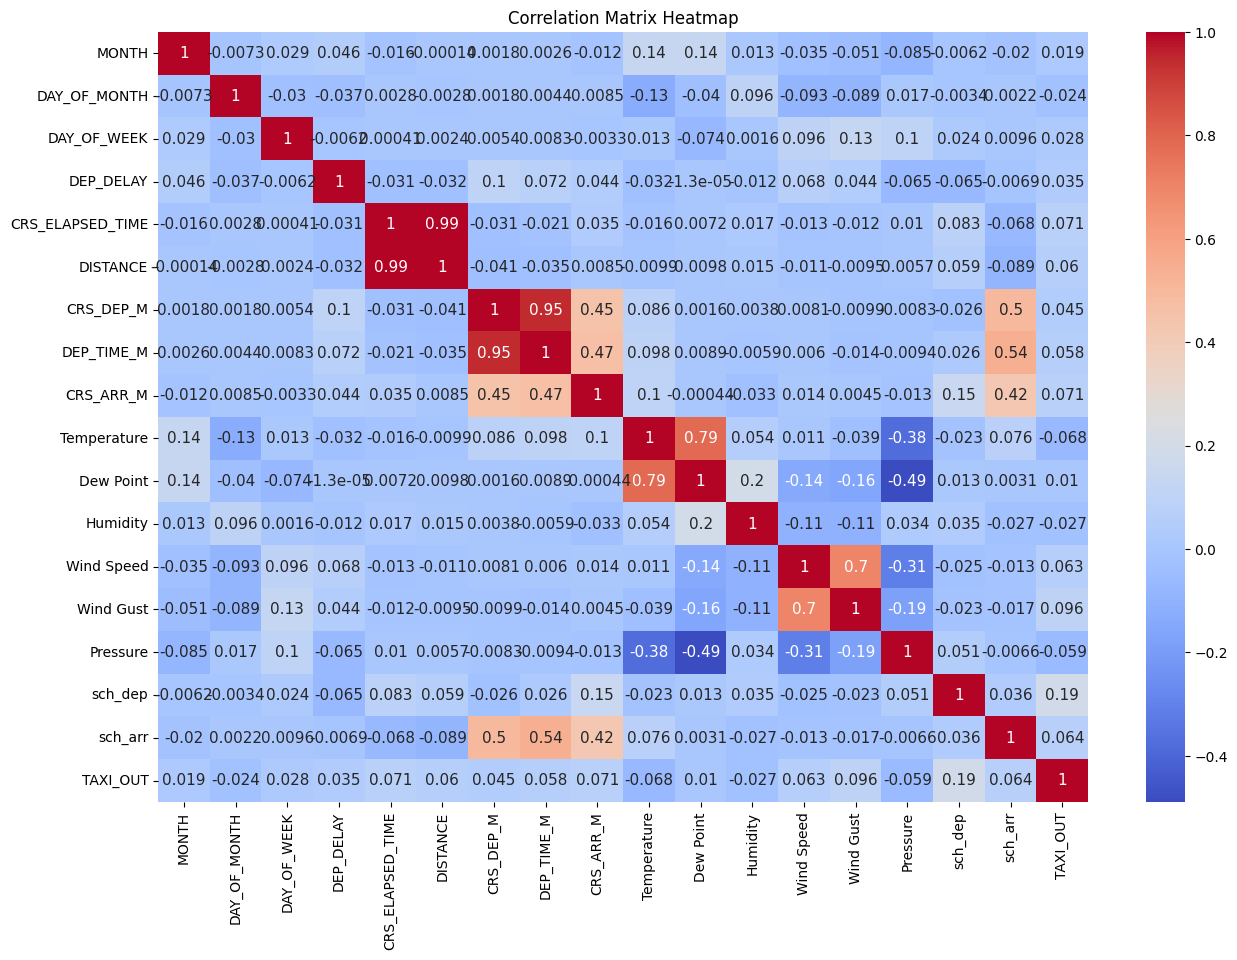

In [97]:
plt.figure(figsize=(15,10)) #to increase the size of the figure
sns.heatmap(correl_mat, cmap = 'coolwarm', annot=True, annot_kws={'size': 11})
plt.title("Correlation Matrix Heatmap", loc="center")

# Machine learning model (Multivariate regression)
We selected four features:
x1 = 


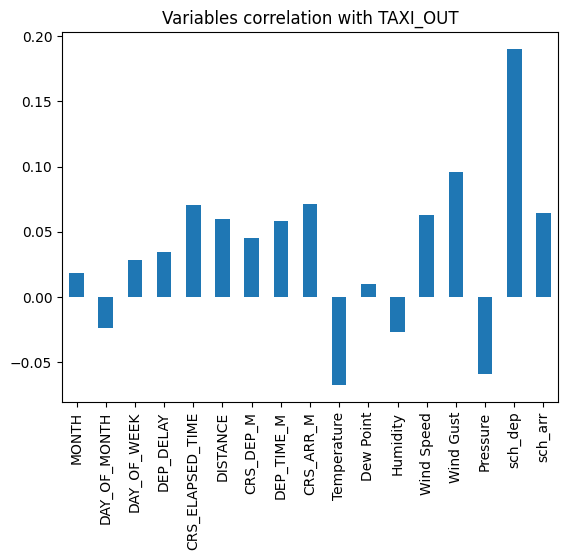

In [98]:
# Select all numeric columns except 'TAXI_OUT'
numeric_cols_except_taxi_out = jfk.select_dtypes(include=[np.number]).drop(columns=['TAXI_OUT'])

# Calculate correlations with 'TAXI_OUT'
correlation = numeric_cols_except_taxi_out.corrwith(jfk['TAXI_OUT'])

# Create a bar plot
correlation.plot(kind='bar', title='Variables correlation with TAXI_OUT')
plt.show()



MODEL BUILDING
We selected four independant variables

x1: SCH DEP (the scheduled departure time)

x2: Pressure

x3: Wind Gust

x4: Temperature

Our dependant variable remains unchanged compared to the single regression model
y= Taxi Out

In [99]:
# MODEL BUILDIING
# Define our independent variables
x1 = jfk.iloc[:, -3]  # Variable 1 sch dep
x2 = jfk.iloc[:, -5]  # Variable 2 Pressure
x3 = jfk.iloc[:, -6]  # Variable 3 Wind Gust
x4 = jfk.iloc[:, -11]  # Variable 4 Temperature
# Define your dependent variable
y = jfk.iloc[:, -1]  # Your dependent variable (e.g., y)
# Combine the independent variables into a single DataFrame
X = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4})

MODEL TRAINING
Now we need parts from training, testing, and validation
We decided to split splitting our data
80% training, 20% for testing

In [100]:
# MODEL TRAINING
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
# Create a Linear Regression model
lin_reg = LinearRegression()
# Train the model using the training data
lin_reg.fit(X_train, y_train)

LinearRegression()

MODEL TESTING

In [101]:
# Predict the dependent variable for the test data
y_pred = lin_reg.predict(X_test)

# Get the coefficients and intercept of the regression equation
coefficients = np.round(lin_reg.coef_,2)
intercept = np.round(lin_reg.intercept_,2)

# Print the coefficients and intercept
for i, col in enumerate(X.columns):
    print(f"The coefficient for {col} is {coefficients[i]}")

print(f"The intercept is {intercept}")

# Additional analysis or evaluation steps can be added here

The coefficient for x1 is 0.14
The coefficient for x2 is -2.04
The coefficient for x3 is 0.05
The coefficient for x4 is -0.08
The intercept is 80.96


# Model Evaluation
Now we check for accuracy of our model

In [102]:
# Predict the dependent variable for the test data
y_pred = lin_reg.predict(X_test)  # Assuming X_test contains x1, x2, x3, x4

# Create a DataFrame for actual and predicted values
jfk = pd.DataFrame({"Actual": y_test, "Predicted": np.round(y_pred, 2)})

# Calculate the percentage difference and add it as a new column
jfk['Difference (%)'] = round(((jfk['Actual'] - jfk['Predicted']) / jfk['Actual']) * 100, 2)

# Print the updated DataFrame
print(jfk)


       Actual  Predicted  Difference (%)
9362       23      21.54            6.35
23840      14      23.63          -68.79
24617      22      23.45           -6.59
24899      19      25.37          -33.53
2007       20      19.29            3.55
...       ...        ...             ...
25685      18      20.37          -13.17
376        16      20.46          -27.88
10922      34      22.47           33.91
7106       17      19.02          -11.88
2829       19      21.75          -14.47

[5764 rows x 3 columns]


Key metrics

In [103]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:', np.round(mae,2))
print('MSE:', np.round(metrics.mean_squared_error(y_test, y_pred),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('R2:', np.round(metrics.r2_score(y_test, y_pred),3))


MAE: 5.37
MSE: 45.4
RMSE: 6.74
R2: 0.053


Try Ridge regression, and Lasso regression

In [104]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
rreg =Ridge(alpha=0.01)
rreg.fit(X_train,y_train)
y_pred = rreg.predict(X_test)
actual = y_test
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Ridge Regression:", np.round(rmse,2))

# LASSO REGRESSION
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.05)
l.fit(X_train,y_train)
prediction = l.predict(X_test)
actual = y_test
rmse= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Lasso Regression:", np.round(rmse,2))

Ridge Regression: 6.74
Lasso Regression: 6.74
